In [15]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/AAPL_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  10998


Summary Statistics:
                                 Date          Open          High  \
count                          10998  10998.000000  10998.000000   
mean   2002-09-26 14:14:28.085106304     22.299160     22.539055   
min              1980-12-12 00:00:00      0.049665      0.049665   
25%              1991-10-28 06:00:00      0.299107      0.303710   
50%              2002-09-23 12:00:00      0.531250      0.537946   
75%              2013-08-25 06:00:00     20.204196     20.389554   
max              2024-07-30 00:00:00    236.479996    237.229996   
std                              NaN     46.003685     46.496031   

                Low         Close     Adj Close        Volume     Dividends  \
count  10998.000000  10998.000000  10998.000000  1.099800e+04  10998.000000   
mean      22.068367     22.312754     21.494496  3.180806e+08      0.000752   
min        0.049107      0.049107      0.037857  0.000000e+00      0.000000   
25%        0.290179      0.298549      0.241840  1

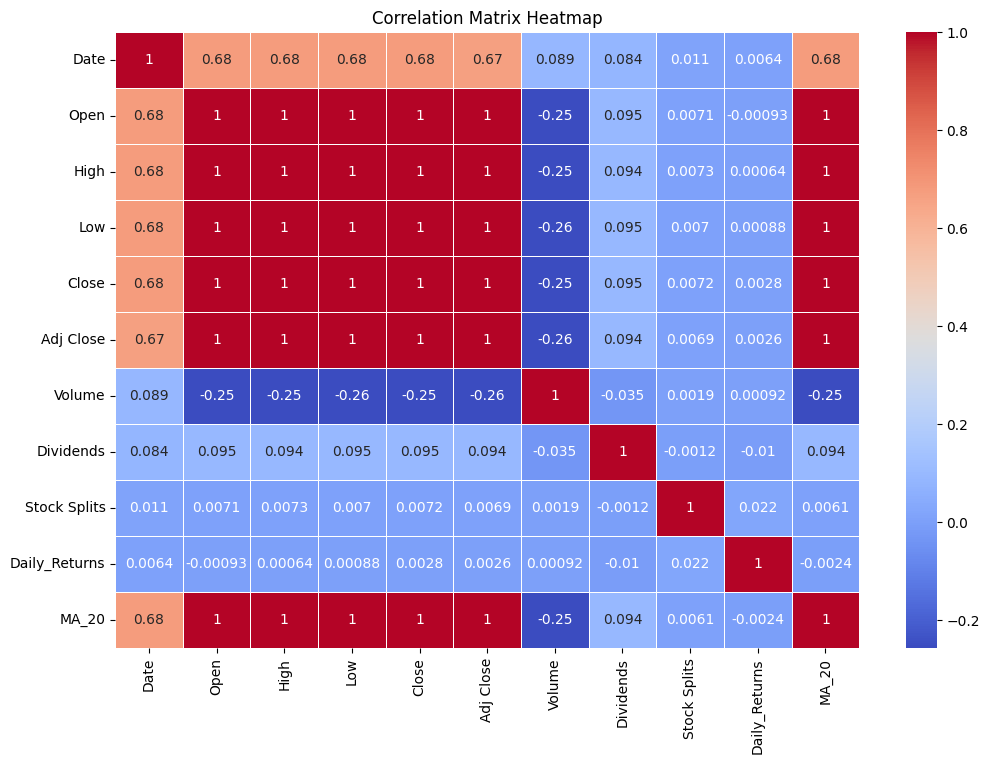

Outliers in 'Close' column:
             Date        Open        High         Low       Close   Adj Close  \
9490  2018-08-01   49.782501   50.439999   49.327499   50.375000   47.832462   
9491  2018-08-02   50.145000   52.095001   50.087502   51.847500   49.230637   
9492  2018-08-03   51.757500   52.185001   51.369999   51.997501   49.373077   
9493  2018-08-06   52.000000   52.312500   51.767502   52.267502   49.629440   
9494  2018-08-07   52.330002   52.375000   51.689999   51.777500   49.164162   
...          ...         ...         ...         ...         ...         ...   
10993 2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994 2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995 2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996 2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997 2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          

In [17]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

In [ ]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
